# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [7]:
# Define Function
'''
input Gray Scale image,No of gray levels
return 
'''
def Negative(img,Threshold=256):
    return Threshold-1-img


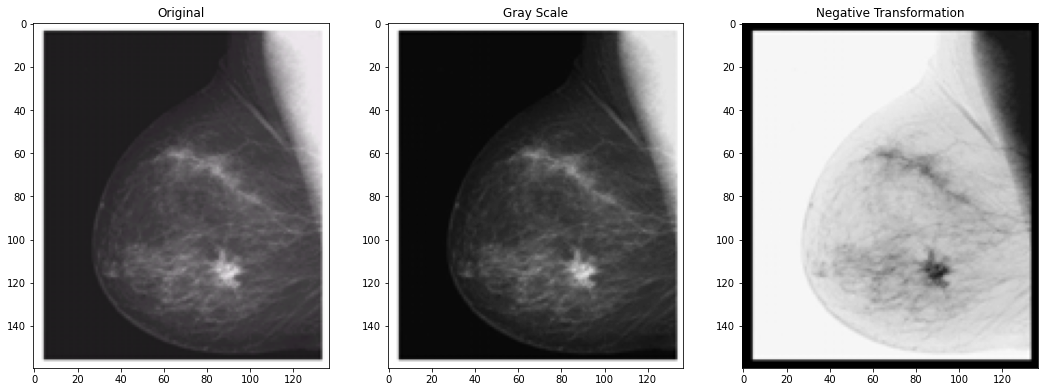

In [8]:
'''
1
Negative Transformation
'''

# Read img
Original_img = io.imread('./imgs/Picture1.png')

# Convert Img to Gray Scale to Apply Negative Transformation(Grey scale Transformation Technique)[0-1]
Gray_img = rgb2gray(rgba2rgb(Original_img))

# Call Function
Negative_img=Negative(img=Gray_img,Threshold=2)

# Display Results
show_images([Original_img,Gray_img,Negative_img],["Original","Gray Scale","Negative Transformation"])

➼ Negative Transformation Equation (i/p gray image is normalized) : 

pixel[i]=Threshold-1-pixel[i] 

where Threshold is the Threshold of the img(Max value of range of the img)

Note: This orignal image has white frame that appears after apply negative transformation :)

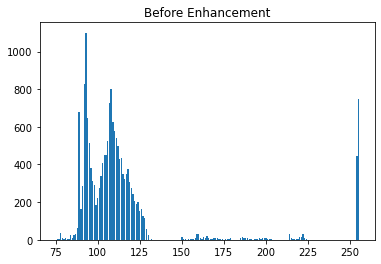

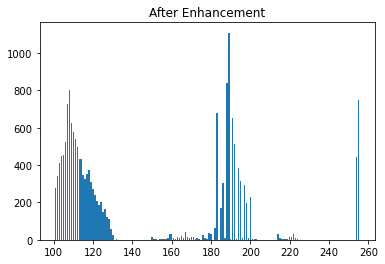

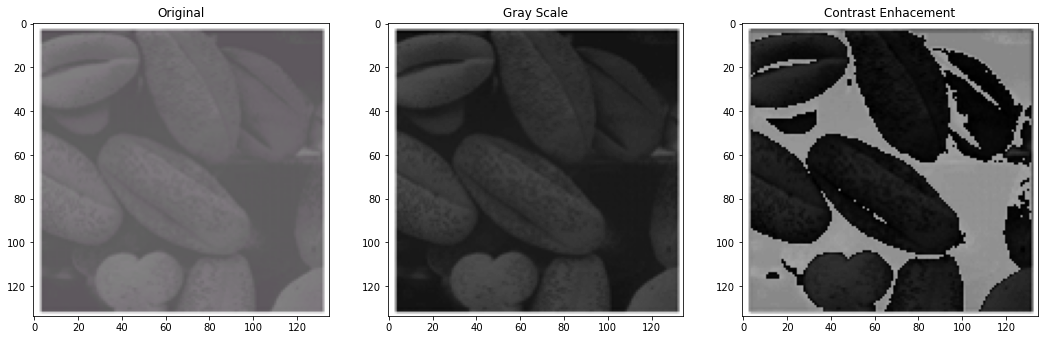

The Gray Scale
[[116 113 119 125 121 117 115 115 114 116]
 [115 111 120 123 118 117 122 119 115 116]
 [118 118 120 120 119 118 119 121 117 116]
 [117 118 114 118 120 116 115 119 119 119]
 [116 113 110 115 116 116 118 118 119 121]
 [115 113 111 109 109 114 118 118 118 119]
 [118 115 109 108 111 109 108 112 112 116]
 [118 115 110 112 116 110 106 109 112 115]
 [115 114 109 110 114 113 113 113 115 116]
 [116 114 112 106 107 117 116 112 115 114]]
The Result Img
[[116 113 119 125 121 117 115 115 114 116]
 [115 111 120 123 118 117 122 119 115 116]
 [118 118 120 120 119 118 119 121 117 116]
 [117 118 114 118 120 116 115 119 119 119]
 [116 113 110 115 116 116 118 118 119 121]
 [115 113 111 109 109 114 118 118 118 119]
 [118 115 109 108 111 109 108 112 112 116]
 [118 115 110 112 116 110 106 109 112 115]
 [115 114 109 110 114 113 113 113 115 116]
 [116 114 112 106 107 117 116 112 115 114]]


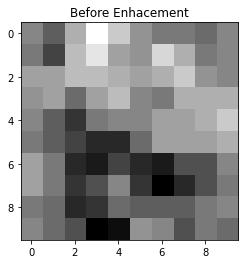

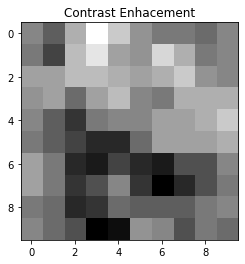

In [33]:
'''
2
Contrast Enhancement
'''
# Read img
Original_img = io.imread('./imgs/Picture2.png')
# Convert Img to Gray Scale [0-1]
Gray_img = rgb2gray(rgba2rgb(Original_img))

Gray_img=(Gray_img*255).astype(np.uint8)

# Convert 0-255
showHist(Gray_img,title="Before Enhancement")

# define func
# Def:linear contrast enhancemnt is apllied from 0-100 to map to 50-200
# input:gray scale img [0-255]
# return:Result img [0-255]
def Contrast_enhancement(img):    
    #Condiotial Matrix
    Condition=((img>=0)&(img<=100))*1
    
    #Apply Transformation to These pixels satisfying only range above
    # y=1.5x+50 0<=x<=100 , y=x elsewhere
    img=(0.5*Condition+1)*img+50*Condition
    return img.astype(np.uint8)

# Call function
Enhanced_img=Contrast_enhancement(Gray_img)
showHist(Enhanced_img,title="After Enhancement")


# Display Results
show_images([Original_img,Gray_img,Enhanced_img],["Original","Gray Scale","Contrast Enhacement"])

print("The Gray Scale")
print(Gray_img[80:90,80:90])
print("The Result Img")
print(Enhanced_img[80:90,80:90])

show_images([Gray_img[80:90,80:90]],["Before Enhacement"])
show_images([Enhanced_img[80:90,80:90]],["Contrast Enhacement"])

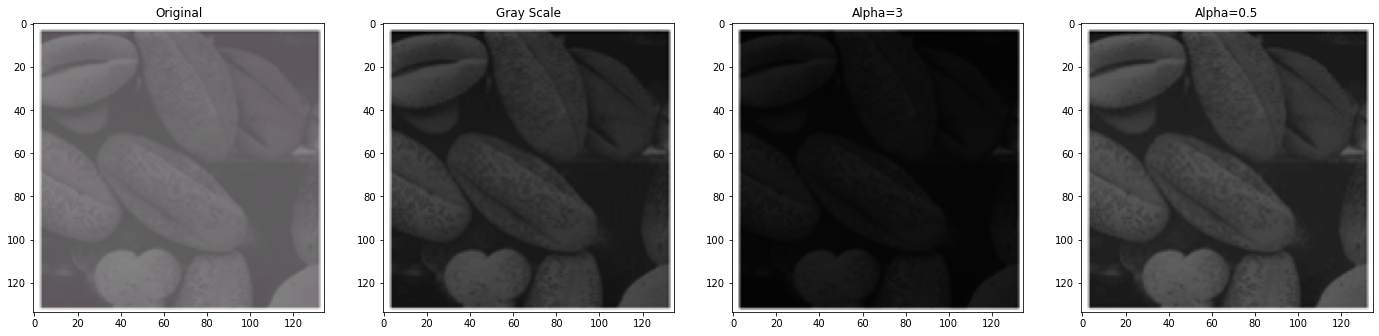

In [10]:
'''
Gamma Correction
'''
# Read img
Original_img = io.imread('./imgs/Picture2.png')

# Convert Img to Gray Scale [0-1]
Gray_img = rgb2gray(rgba2rgb(Original_img)) 

# Def Func
def Gamma_Correction(img,c,alpha):
    result=np.copy(img)
    result=c*(result**alpha)
    return result

# c=1 alpha=3
Result1=Gamma_Correction(img=Gray_img,c=1,alpha=3)

# c=1 alpha=0.5
Result2=Gamma_Correction(img=Gray_img,c=1,alpha=0.5)

# Display Result
show_images([Original_img,Gray_img,Result1,Result2],["Original","Gray Scale","Alpha=3","Alpha=0.5"])


since img is normalized [0-1] as aplha increase the values decreases (darker)

First Result The image is darker

Second Result The image is more lighter

as alpha Decreases the image is more brighter

The result image is brighter the gray scale one

In [4]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
#Note Img is passed by reference 
def Histogram_Equalization(Original_img,G):
    imgHist = np.array(histogram(Original_img, nbins=G))
    
    # Adding Lost Values
    Bgindx=imgHist[1,0]
    array1=np.zeros(shape=(1,Bgindx),dtype=np.uint8)

    Edindx=imgHist[1,-1]
    array2=np.zeros(shape=(1,G-1-Edindx),dtype=np.uint8)
    
    #Conactinating rest of histogram
    imgHist=np.concatenate((array1,[imgHist[0,:]],array2),axis=1)[0,:]
#     print("Orignal Img Histogram")
#     print(imgHist)

    # Getting Probalobity 
    summation=sum(imgHist)
    Probabilty=imgHist/summation
#     print("Probability")
#     print(Probabilty)

    # Cumlative Probabilty
    CP=np.cumsum(Probabilty)
#     print("Cumalative Probability")
#     print(CP)

    mapping=((G-1)*CP).round(decimals=0, out=None).astype(np.uint8)
#     print("Mapping")
#     print(mapping)
    
    # Second way
    result=np.copy(Original_img)
#     print("Apply Algo2 on this img")
#     print(result)
   
    # Mapping Table
    mapping=dict(enumerate(mapping))
#     print("mapping")
#     print(mapping)
    
    result = [[mapping.get(v) for v in l] for l in Original_img]
#     print("second way")
#     print(result)
    return np.array(result)

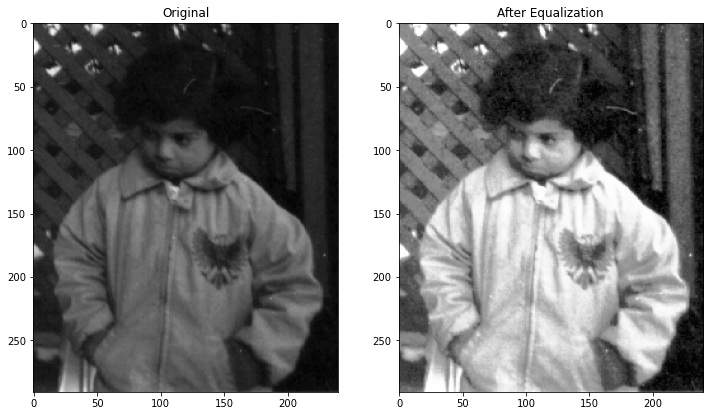

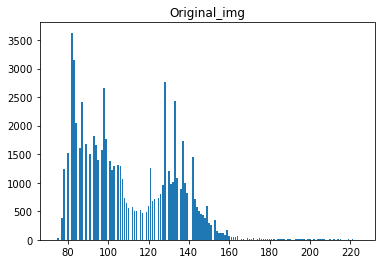

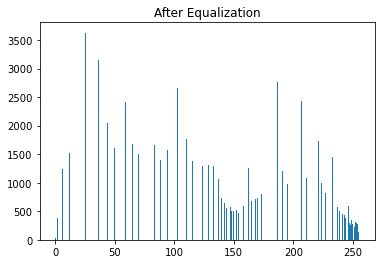

In [16]:
# Pout Img
# Read img 1
Original_img1 = io.imread('./imgs/pout.tif')

# Call func
Result1=Histogram_Equalization(Original_img1,G=256)

#Display Result
show_images([Original_img1,Result1],["Original","After Equalization"])
showHist(Original_img1,title="Original_img")
showHist(Result1,title="After Equalization")

Results: It is clear that the image becmoes nore brighter and more details have appeared to us for example the window behind the boy to the left of him was as if one block for us but after equalization we saw that there were details in it that we can't recognize it by our eyes

The range of our pixels have been strentched over the 256 level but at the beginning it was from 80 (condesed) and few pixels over 160 grey level

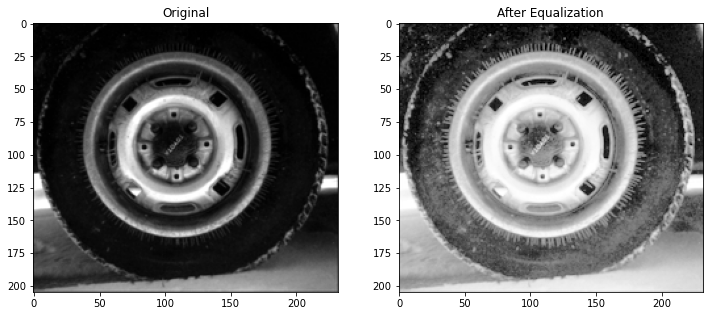

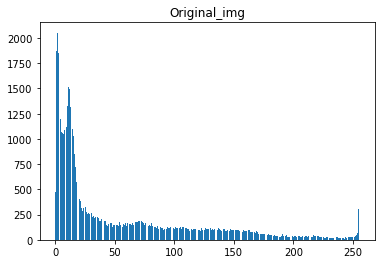

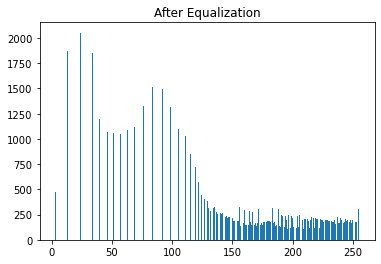

In [17]:
# Pout Img
# Read img 2
Original_img2 = io.imread('./imgs/tire.tif')

# Call func
Result2=Histogram_Equalization(Original_img2,G=256)

#Display Result
show_images([Original_img2,Result2],["Original","After Equalization"])
showHist(Original_img2,title="Original_img")
showHist(Result2,title="After Equalization")

Results: It is clear that this image already has pixels in nearly all grey levels (in contrast to the above image which has histogram starting from gray level 80)  
But here the Algorith will target these condesed peaks at the low grey levels(that's why the image has low brightness),stretching these condesed preaks over the 256 grey level
Allowing us to see more details for example the details on the tire rubber

image
[[2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]]
Orignal Img Histogram
[ 0  0 10 50 30  0  0  0  0]
Probability
[0.         0.         0.11111111 0.55555556 0.33333333 0.
 0.         0.         0.        ]
Cumalative Probability
[0.         0.         0.11111111 0.66666667 1.         1.
 1.         1.         1.        ]
Mapping
[0 0 1 5 8 8 8 8 8]
Apply Algo2 on this img
[[2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]
 [2 3 3 3 3 3 4 4 4]]
mapping
{0: 0, 1: 0, 2: 1, 3: 5, 4: 8, 5: 8, 6: 8, 7: 8, 8: 8}
second way
[[1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 5 5 5 5 5 8 8 8]
 [1 

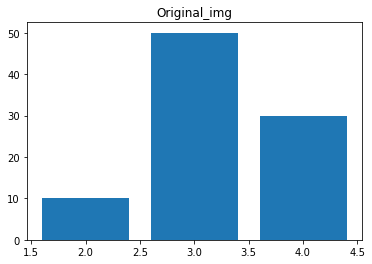

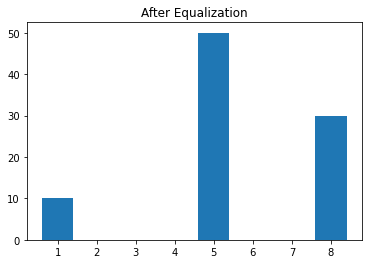

In [37]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
#Note Img is passed by reference 
def Histogram_Equalization_Debug(Original_img,G):
    imgHist = np.array(histogram(Original_img, nbins=G))
#     print('Histogram',imgHist)
    # Adding Lost Values
    Bgindx=imgHist[1,0]
    array1=np.zeros(shape=(1,Bgindx),dtype=np.uint8)

    Edindx=imgHist[1,-1]
    array2=np.zeros(shape=(1,G-1-Edindx),dtype=np.uint8)
    
    #Conactinating rest of histogram
    imgHist=np.concatenate((array1,[imgHist[0,:]],array2),axis=1)[0,:]
    print("Orignal Img Histogram")
    print(imgHist)

    # Getting Probalobity 
    summation=sum(imgHist)
    Probabilty=imgHist/summation
    print("Probability")
    print(Probabilty)

    # Cumlative Probabilty
    CP=np.cumsum(Probabilty)
    print("Cumalative Probability")
    print(CP)

    mapping=((G-1)*CP).round(decimals=0, out=None).astype(np.uint8)
    print("Mapping")
    print(mapping)
    
    # Second way
    result=np.copy(Original_img)
    print("Apply Algo2 on this img")
    print(result)
   
    # Mapping Table
    mapping=dict(enumerate(mapping))
    print("mapping")
    print(mapping)
    
    result = [[mapping.get(v) for v in l] for l in Original_img]
    print("second way")
    print(np.array(result))
    return np.array(result)

# Example in the lecture
matrix=np.ones(shape=(10,9),dtype=np.uint8)
array=[[2,3,3,3,3,3,4,4,4]]
matrix=array*matrix
print("image")
print(matrix)

Result=Histogram_Equalization_Debug(matrix,G=9)

#Display Result
print("Results")

showHist(matrix,title="Original_img")
showHist(Result,title="After Equalization")

[[6 6 4 ... 1 1 1]
 [3 2 3 ... 1 1 1]
 [3 1 0 ... 3 2 2]
 ...
 [2 1 2 ... 1 2 2]
 [1 1 1 ... 2 2 1]
 [1 1 1 ... 2 3 2]]


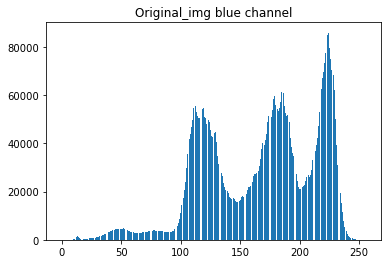

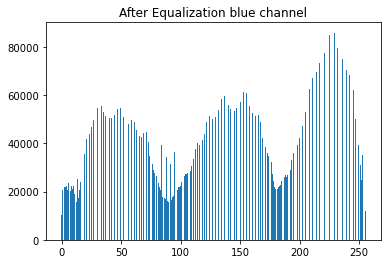

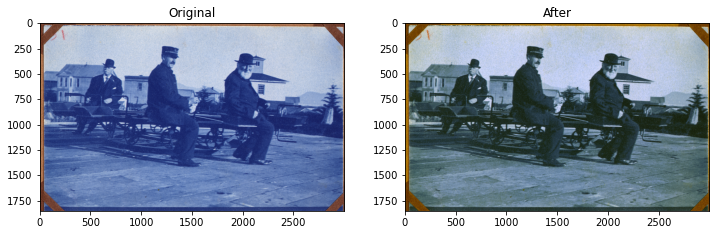

In [11]:
Original_img = io.imread('./1.jpg')

result=np.copy(Original_img)
result[:,:,2]=Histogram_Equalization(Original_img[:,:,2],G=256)

showHist(Original_img[:,:,2],title="Original_img blue channel")
showHist(result[:,:,2],title="After Equalization blue channel")
print(result[:,:,2])


# io.imshow(result)
show_images([Original_img,result],["Original","After"])

[[ 43 173 212 ... 255 255 200]
 [203 255 255 ... 255 255 255]
 [255 175 202 ...   1   1 255]
 ...
 [255  11  82 ... 173  55 255]
 [255   3   6 ... 130  87 255]
 [220 199 255 ... 255 255 220]]


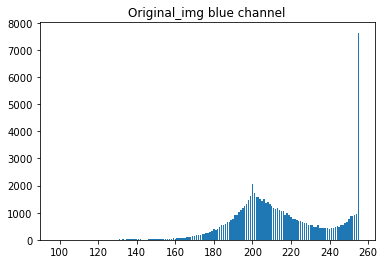

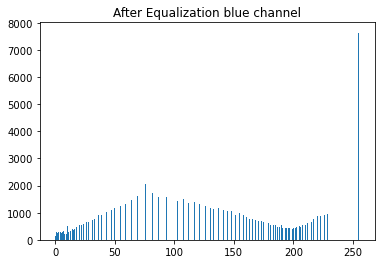

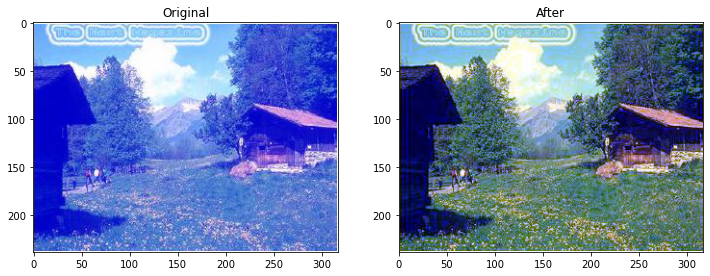

In [7]:
Original_img = io.imread('./2.jpg')

result=np.copy(Original_img)
result[:,:,2]=Histogram_Equalization(Original_img[:,:,2],G=256)

showHist(Original_img[:,:,2],title="Original_img blue channel")
showHist(result[:,:,2],title="After Equalization blue channel")
print(result[:,:,2])


# io.imshow(result)
show_images([Original_img,result],["Original","After"])